In [1]:
import os
import re
import numpy as np
import pandas as pd
from pathlib import Path
from nltk import tokenize
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from datetime import datetime
from textwrap import dedent
import pickle
from nltk import sent_tokenize

from sentence_transformers import SentenceTransformer
from bertopic import BERTopic
import umap.plot
from umap import UMAP
from hdbscan import HDBSCAN
# from mecab import MeCab
from konlpy.tag import Mecab
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer
# from bertopic.representation import KeyBERTInspired
from bertopic.representation import MaximalMarginalRelevance

# from youtube_helper import YouTubeHelper

In [2]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "true"
pd.set_option('display.max_colwidth', None)

In [3]:
DATA_DIR = Path.cwd() / 'content'
MODEL_DIR = Path.cwd() / 'models'

In [6]:
comments = pd.read_csv(DATA_DIR / 'nuclear_comments.csv')

In [8]:
docs = comments.comment_clean.tolist()

In [13]:
def plot_umap(sent_model, sentence_model=None, embeddings=None):
    if sentence_model is None:
        sentence_model = SentenceTransformer(sent_model, device='mps')
    if embeddings is None:
        embeddings = sentence_model.encode(docs, show_progress_bar=True)

    model = UMAP(
        n_neighbors=10,
        min_dist=0.0,
        n_components=2,
        metric='cosine',
        random_state=42,
    )

    mapper = model.fit(embeddings)

    umap.plot.points(mapper)
    
    return sentence_model, embeddings

Batches:   0%|          | 0/5262 [00:00<?, ?it/s]

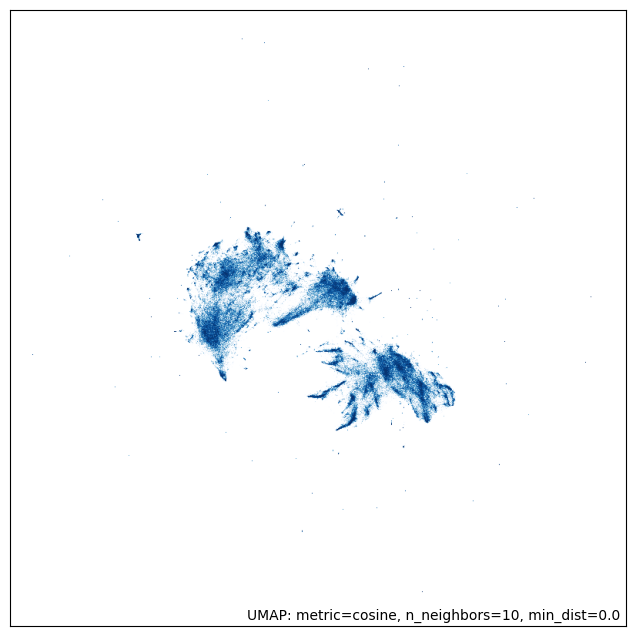

In [14]:
sm1, e1 = plot_umap('paraphrase-multilingual-MiniLM-L12-v2')

In [ ]:
with open(DATA_DIR / 'e1.pkl', 'wb') as f:
    pickle.dump(e1, f)

Batches:   0%|          | 0/5262 [00:00<?, ?it/s]

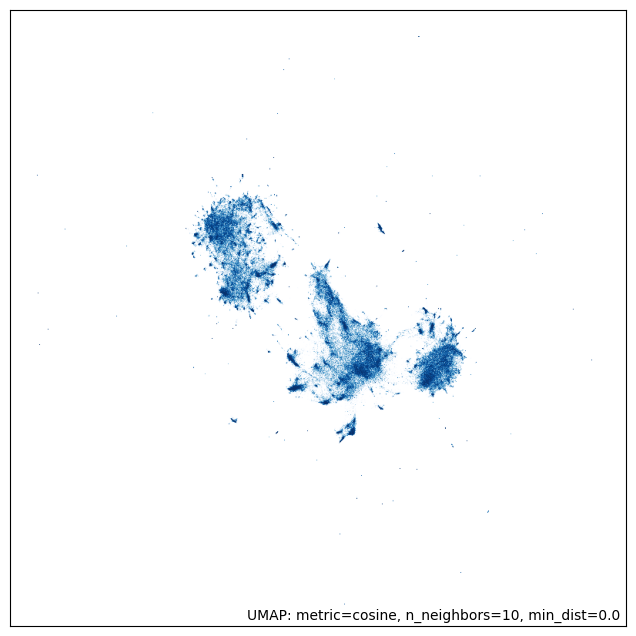

In [15]:
sm2, e2 = plot_umap('paraphrase-multilingual-mpnet-base-v2')

Batches:   0%|          | 0/5262 [00:00<?, ?it/s]

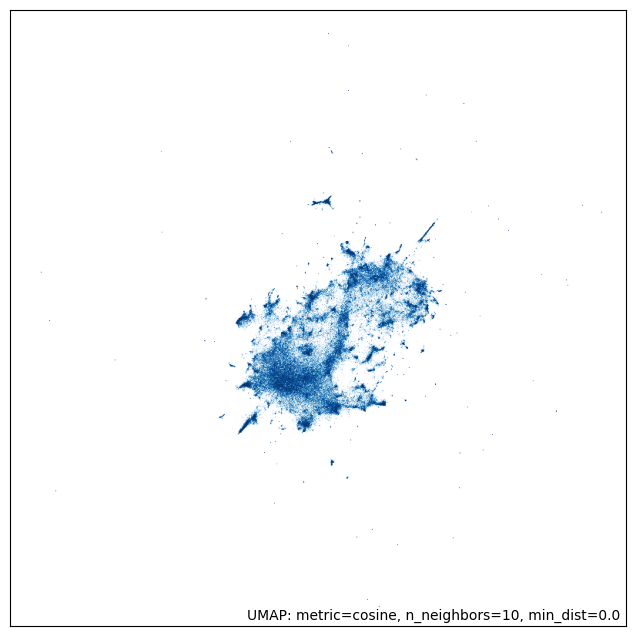

In [16]:
sm3, e3 = plot_umap('snunlp/KR-SBERT-V40K-klueNLI-augSTS')